In [18]:
#!pip install sklearn

In [36]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import scipy.stats as st
import numpy as np
import re
#from sklearn import datasets


from scipy.stats import linregress

%matplotlib notebook

#import packages
import csv


In [20]:
# Reference the file where the CSV is located
it_data= "data_scientist_US.csv"

# Import the data into a Pandas DataFrame
it_data_df = pd.read_csv(it_data)
it_data_df.head(50)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
5,2019-02-06 05:36:06 +0000,https://www.indeed.com/viewjob?jk=14fa3772cd5f...,CIB – Fixed Income Research – Machine Learning...,Accounting/Finance,JP Morgan Chase,New York,NY 10179 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436429033307,NaN,NaN,9571ec617ba209fd9a4f842973a4e9c8,NaN
6,2019-02-06 05:34:37 +0000,https://www.indeed.com/viewjob?jk=c6db96b37f8a...,"Data Scientist, Licensing Operations",Accounting/Finance,Spotify,New York,NY 10011 (Chelsea area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436429042348,NaN,NaN,0ec629c03f3e82651711f2626c23cadb,NaN
7,2019-02-06 05:52:12 +0000,https://www.dice.com/jobs/detail/Sr.-Data-Scie...,Sr. Data Scientist (Can work on Xoriant W2),NaN,Xoriant Corporation,Santa Clara,CA,Usa,Santa clara,California,...,Job Title: - Sr. Data Science Consultant Durat...,Contract,NaN,dice,usa,1549436429042523,NaN,NaN,972e897473d65f34b8e7f1c1b4c74b1c,NaN
8,2019-02-06 05:34:18 +0000,https://www.indeed.com/viewjob?jk=0fc298b9f3a8...,"Data Scientist, Aladdin Wealth Tech, Associate",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436429066810,NaN,NaN,80d64b46bc7c89602f63daf06b9f1b4c,NaN
9,2019-02-06 06:03:55 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Adroit Resources,San Francisco,CA,Usa,San francisco,California,...,• 3+ years related a professional experience ...,Contract,NaN,dice,usa,1549436429884667,NaN,NaN,b772c6ef8ee7631895ab9a59b5e8b2c1,NaN


In [21]:
#Find out what kind of information is in the data

for col in it_data_df.columns: 
    print(col) 



crawl_timestamp
url
job_title
category
company_name
city
state
country
inferred_city
inferred_state
inferred_country
post_date
job_description
job_type
salary_offered
job_board
geo
cursor
contact_email
contact_phone_number
uniq_id
html_job_description


In [44]:
total_rows = it_data_df['crawl_timestamp'].count
print (total_rows)

# clean up data frame for more consistent text entries

job_title_cleanup = it_data_df

# Making all entries lower case for easier cleanup
job_title_cleanup['job_title'] = job_title_cleanup['job_title'].apply(lambda x: x.lower())

# Trying to standardize the data in the job_title column
job_title_cleanup.loc[job_title_cleanup['job_title'].str.contains('assoc'),'job_title'] = 'Associate Data Scientist'
job_title_cleanup


<bound method Series.count of 0       2019-02-06 05:26:22 +0000
1       2019-02-06 05:33:41 +0000
2       2019-02-06 05:33:35 +0000
3       2019-02-06 05:33:42 +0000
4       2019-02-06 05:48:23 +0000
                  ...            
9995    2019-09-29 00:55:15 +0000
9996    2019-10-01 00:50:33 +0000
9997    2019-09-26 00:53:10 +0000
9998    2019-09-27 00:41:31 +0000
9999    2019-09-27 00:53:10 +0000
Name: crawl_timestamp, Length: 10000, dtype: object>


,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,enterprise data scientist i,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,data scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,data scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,Associate Data Scientist,Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,senior data scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,data scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,Join Upstart and help build the future of cred...,Full Time,$100k - 135k | Equity,Stackoverflow,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"data scientist, (staff or principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"siri - embedded data scientist, data organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Job Summary: Would you like to play a part in ...,Full Time,NaN,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"data scientist, (staff or principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...


In [30]:
# create a dataframe grouping by the 'job_title' column
sorted_it_df = it_data_df.groupby('job_title')
sorted_it_df.head(50)

# clean up data frame for more consistent text entries


,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2019-09-29 00:43:50 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Job Summary: Would you like to play a part in ...,Full Time,NaN,Stackoverflow,NaN,1569916869827785,NaN,NaN,d2285b6e99067fb246c0f674995dad7d,<h2>About this job</h2>\r\n<p><span>Job type: ...
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Job Summary: Would you like to play a part in ...,Full Time,NaN,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...


In [24]:
# Create a dataframe for counts of data
job_title_count = pd.DataFrame(sorted_it_df['job_title'].count())

In [ ]:
full_time_jobs = sorted_it_df.query('job_type' == 'Full Time')

<IPython.core.display.Javascript object>


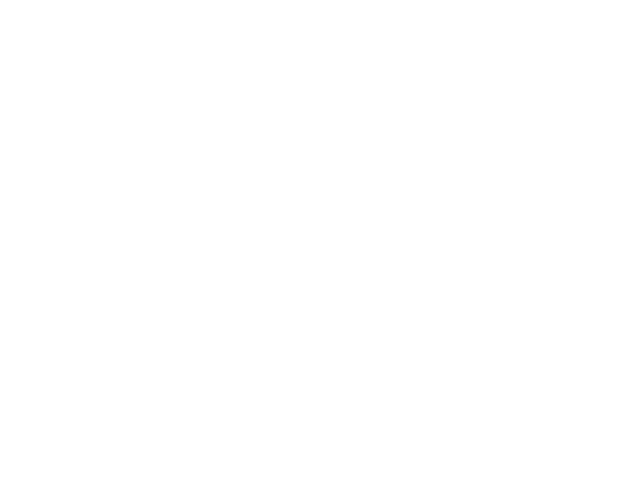

AttributeError: 'Rectangle' object has no property 'size'

In [25]:
count_chart = job_title_count.plot(kind='bar', title="Number of data points for each Job title", color="red", size = (50,5),)

# Set the x and y labels
count_chart.set_xlabel("job title")
count_chart.set_ylabel("Number of Data Points")
#plt.tight_layout()
# Save the figure
#plt.savefig("PandaBarChart.png")

plt.show()

<IPython.core.display.Javascript object>


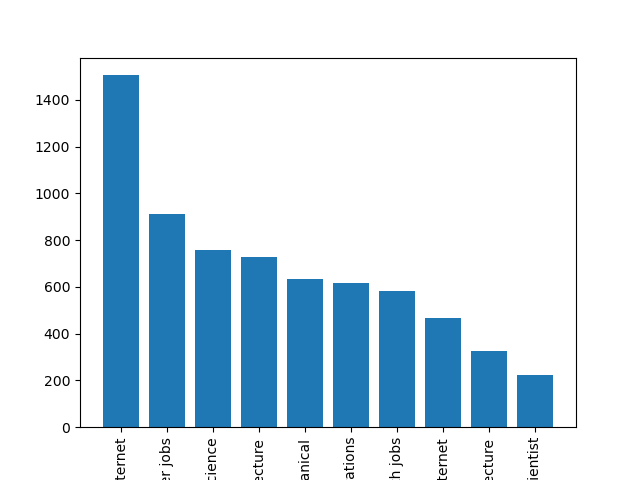

In [97]:
# Trying out the idea of a bar graph by job category

by_category = it_data_df[['category']].dropna(how='any')
openings_by_category = by_category['category'].value_counts().rename_axis('Category').reset_index(name = 'Count')
openings_by_category.sort_values('Count',ascending=False)

top_10_categories = openings_by_category.sort_values('Count', ascending=False).head(10)

plt.bar(top_10_categories['Category'],top_10_categories['Count'])
plt.xticks(rotation = 90)
plt.show()